In [23]:
# 2 скрытых слоя по 8 нейронов.

# ИМПОРТ
#import tensorflow_decision_forests as tfdf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve, ConfusionMatrixDisplay

import os
import tensorflow as tf
import math

import pandas as pd 
import numpy as np
import scipy

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# tensor flow - глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



# для визуализации
from matplotlib import pyplot

%matplotlib inline

In [24]:
# ЗАГРУЗКА ФАЙЛОВ
path = r'C:\users\leon-\BKP\data\inner.xlsx'
df = pd.read_excel(path, header=0, index_col = 0)

df.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0,7.0,57.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,60.0


In [25]:
### описательная статистика


df.describe() # распределение признаков

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


In [26]:
df.corr() # коэфициент корреляции

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


In [27]:
df.info() # общая информация о датасете и типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки                          1023 non-null   int64  
 11  Шаг нашивки      

In [28]:
df['Угол нашивки'].value_counts() 
# информация о первом столбце - 0, и количество уникальных значений, 
# можно перебирать столбцы чтобы найти примерно равное значение признаков 50/50

0    520
1    503
Name: Угол нашивки, dtype: int64

In [29]:
##Создание выборок
# Создаем х и у
X, y = df.values[:, : -1], df.values[:, -1]

In [30]:
# Убедимся что данные предоставлены числами с плавающей точкой
X = X.astype('float') # приводим значения к Float

In [31]:
y[1] #целевая перемнная

60.0

In [32]:
X[1]

array([1.85714286e+00, 2.03000000e+03, 7.38736842e+02, 5.00000000e+01,
       2.37500000e+01, 2.84615385e+02, 2.10000000e+02, 7.00000000e+01,
       3.00000000e+03, 2.20000000e+02, 0.00000000e+00, 4.00000000e+00])

In [33]:
#LabelEncoder для у

y= LabelEncoder().fit_transform(y) #обучим у командой fit_transform

In [34]:
# Создание тестовой и обучающей выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, shuffle = True)
#X, y - передаем параметры, test_size= 0.25 - размер тестовой выборки, shuffle = true -перемешивание датасет

In [35]:
#from sklearn.model_selection import train_test_split

#x_train, x_val, y_train, y_val = train_test_split(
   # x, y, random_state=42, train_size=0.8, stratify=y, shuffle=True
#)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve

In [37]:
#knn_baseline = KNeighborsClassifier()
#knn_baseline.fit(X_train, y_train)

#y_train_predicted_knn = knn_baseline.predict_proba(X_train)[:, 1]
#y_test_predicted_knn = knn_baseline.predict_proba(X_test)[:, 1]

#roc_knn_train = roc_auc_score(y_train, y_train_predicted_knn)
#roc_knn_test = roc_auc_score(y_test, y_test_predicted_knn)

#print(f"ROC AUC на обучающей {roc_knn_train}")
#print(f"ROC AUC на тестовой {roc_knn_test}")

In [38]:
print(X_train.shape) #проверим размерность выборок должно совпадать
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(767, 12)
(256, 12)
(767,)
(256,)


Epoch 1/20
24/24 [==============================] - 1s 5ms/step - loss: 28300.3105 - val_loss: -57388.9141
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: -156817.3906 - val_loss: -232148.1875
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: -387368.8125 - val_loss: -478457.8438
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: -718936.8125 - val_loss: -831626.7500
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: -1182771.2500 - val_loss: -1318797.2500
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: -1823578.1250 - val_loss: -1983577.6250
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: -2686432.2500 - val_loss: -2878772.7500
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: -3834498.5000 - val_loss: -4041447.7500
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: -5314237.0000 - val_loss: -5521000.5000
Epo

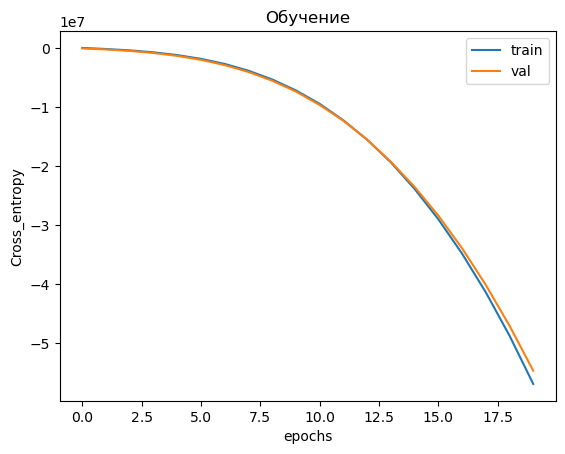

In [39]:
#Нейронная сеть
n_features = X.shape[1] # размерность Х

model = Sequential() # модель последовательная

model.add(Dense(20, activation = 'relu', input_shape = (n_features, ))) # input_shape -  Входная размерность в Х]
model.add(Dense(10, activation = 'relu'))

#model.add(Dense(8, activation = 'relu'))

# выходной слой
model.add(Dense(1, activation = 'sigmoid'))

# Компилирование 
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy')


# Обучение модели

history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# predict test_set
yhat = model.predict(X_test)
#model.predict(tf_serving_dataset, verbose=0)[:10]

# подсчет прогноза
score = accuracy_score(y_test, yhat)
print ('Accuracy: ', score)
# визуализация процесса обучения
pyplot.title('Обучение')
pyplot.xlabel('epochs') # по оси х - эпохи
pyplot.ylabel('Cross_entropy') # по оси у - ошибка
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

In [41]:
#model.compile?

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [45]:
classifier = Pipeline(steps=[('model', model)],
                     verbose=True)

In [47]:
classifier.fit(X_train, y_train)

[Pipeline] ............. (step 1 of 1) Processing model, total=   0.4s


Pipeline(steps=[('model', RandomForestRegressor(random_state=0))], verbose=True)

In [48]:
# Передаем валидационные данные в пайплайн, получаем предсказания
preds = classifier.predict(X_test)

# Оцениваем точность модели
print('MAE:', mean_absolute_error(y_test, preds)) 

MAE: 234.033671875


In [52]:
#print(X_test.iloc[house_to_check].to_string())
#print()
#print(y_test.iloc[house_to_check])

In [54]:
classifier.predict(X_test)

array([444.17, 486.84, 490.14, 499.99, 408.12, 518.55, 561.96, 524.87,
       505.68, 373.96, 329.62, 698.73, 402.81, 471.07, 566.42, 540.13,
       486.96, 524.86, 525.  , 559.86, 512.17, 615.69, 510.82, 527.99,
       517.33, 424.52, 523.88, 441.88, 487.64, 533.38, 535.62, 549.68,
       450.9 , 556.19, 399.44, 623.54, 538.62, 483.39, 513.77, 423.08,
       504.05, 508.62, 492.15, 620.97, 522.48, 523.11, 586.65, 519.36,
       387.66, 502.73, 615.76, 522.9 , 467.75, 430.02, 506.81, 577.66,
       571.37, 515.43, 642.8 , 465.7 , 529.83, 581.79, 553.01, 507.49,
       517.7 , 513.49, 516.49, 477.68, 494.55, 647.87, 553.36, 471.71,
       433.96, 330.45, 553.93, 473.19, 464.02, 550.05, 566.34, 476.27,
       570.78, 490.9 , 541.25, 555.43, 540.75, 565.93, 417.79, 547.05,
       565.51, 451.92, 419.17, 559.44, 357.59, 403.67, 498.84, 488.08,
       456.36, 437.64, 397.47, 478.68, 501.74, 513.25, 522.98, 452.38,
       418.16, 541.74, 611.65, 473.29, 540.52, 544.71, 459.24, 541.35,
      